In [1]:
# Anaylze my reading habits since OCt. 2015. Discover what I like to read.
# By Alex Liebscher

import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


%matplotlib inline

ibm_creds = {
  "url": "https://gateway.watsonplatform.net/natural-language-understanding/api",
  "username": "bb7a01e4-be21-44f1-83a3-2c316cf57d73",
  "password": "x5LAoqvRykNR"
}
natural_language_understanding = NaturalLanguageUnderstandingV1(
  username=ibm_creds['username'],
  password=ibm_creds['password'],
  version='2017-02-27')


In [25]:
file = 'library_export.xlsx'

data = pd.read_excel(file)

data['pages'] = data['pages'].apply(lambda x: (x-data['pages'].max())/(data['pages'].min()-data['pages'].max()))
data['duration'] = data['duration'].apply(lambda x: (x-data['duration'].min())/(data['duration'].max()-data['duration'].min()))
data['rating'] = data['rating'].apply(lambda x: (x-1)/(4))
data['agg_rating'] = data['agg_rating'].apply(lambda x: (x-1)/(4))

mean = data['org_pub_year'].mean()
stddev = data['org_pub_year'].std()

data['org_pub_year'] = data['org_pub_year'].apply(lambda x: (x-mean)/stddev)

In [26]:
print(data.columns.values)

['book_id' 'title' 'author' 'inf_north_amer' 'inf_south_central_amer'
 'inf_asia' 'inf_middle_east' 'inf_west_europe' 'inf_east_europe'
 'inf_africa' 'inf_oceania' 'is_female' 'isbn13' 'rating' 'agg_rating'
 'pages' 'pub_year' 'org_pub_year' 'finished' 'started' 'duration'
 'is_fiction' 'is_nonfiction' 'is_adventure' 'is_biography' 'is_drama'
 'is_expository' 'is_historical_ficition' 'is_memoir' 'is_philosophy'
 'is_poetry' 'is_political_science' 'is_realistic_fiction' 'is_religion'
 'is_science' 'is_sci_fi' 'is_short_story']


count    4.900000e+01
mean     9.856062e-17
std      1.000000e+00
min     -3.227913e+00
25%      2.783537e-01
50%      3.672535e-01
75%      3.868415e-01
max      3.973890e-01
Name: org_pub_year, dtype: float64


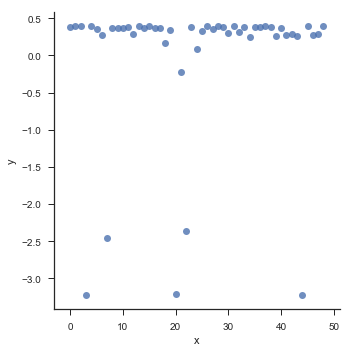

In [19]:
yeardf = pd.DataFrame({'x':data.index, 'y':data['org_pub_year']})

sns.lmplot('x', 'y',
           data=yeardf,
           fit_reg=False)

print(data['org_pub_year'].describe())

/Users/alex/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


          rating  agg_rating
count  49.000000   49.000000
mean    0.637755    0.754847
std     0.265466    0.061247
min     0.000000    0.542500
25%     0.500000    0.720000
50%     0.750000    0.752500
75%     0.750000    0.800000
max     1.000000    0.875000


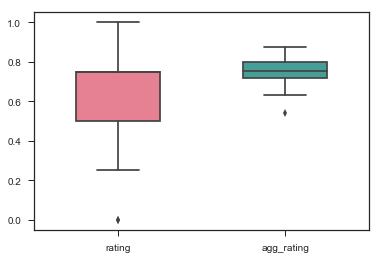

In [27]:
data_infs = ['inf_north_amer', 'inf_south_central_amer', 'inf_asia', 'inf_middle_east', 'inf_west_europe', 'inf_east_europe', 'inf_africa', 'inf_oceania']
data_meta = ['is_female', 'rating', 'agg_rating', 'pages', 'pub_year', 'org_pub_year', 'finished', 'started', 'duration']
data_g = ['is_fiction', 'is_nonfiction']
data_sg = ['is_adventure', 'is_biography', 'is_drama', 'is_expository', 'is_historical_ficition', 'is_memoir', 'is_philosophy',
 'is_poetry', 'is_political_science', 'is_realistic_fiction', 'is_religion',
 'is_science', 'is_sci_fi', 'is_short_story']

sns.boxplot(data=data[['rating','agg_rating']], palette='husl', width=0.5)
print(data[['rating','agg_rating']].describe())

/Users/alex/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


       is_fiction  is_nonfiction
count   49.000000      49.000000
mean     0.530612       0.469388
std      0.504234       0.504234
min      0.000000       0.000000
25%      0.000000       0.000000
50%      1.000000       0.000000
75%      1.000000       1.000000
max      1.000000       1.000000


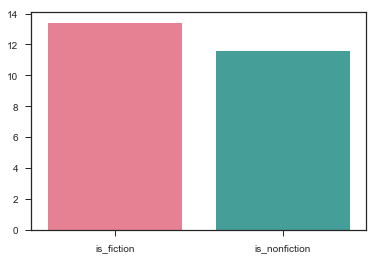

In [75]:
sns.barplot(data=data[data_g].cumsum(), palette='husl', ci=None)
print(data[data_g].describe())

/Users/alex/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


       inf_north_amer  inf_south_central_amer   inf_asia  inf_middle_east  \
count       49.000000               49.000000  49.000000        49.000000   
mean         0.551020                0.020408   0.122449         0.040816   
std          0.502545                0.142857   0.331201         0.199915   
min          0.000000                0.000000   0.000000         0.000000   
25%          0.000000                0.000000   0.000000         0.000000   
50%          1.000000                0.000000   0.000000         0.000000   
75%          1.000000                0.000000   0.000000         0.000000   
max          1.000000                1.000000   1.000000         1.000000   

       inf_west_europe  inf_east_europe  inf_africa  inf_oceania  
count        49.000000        49.000000   49.000000    49.000000  
mean          0.346939         0.061224    0.061224     0.020408  
std           0.480929         0.242226    0.242226     0.142857  
min           0.000000         0.00000

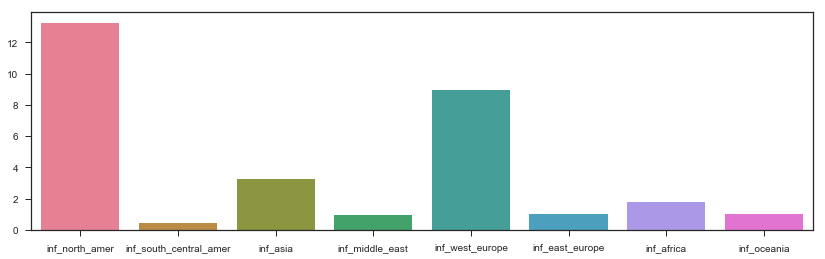

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 4)
sns.barplot(data=data[data_infs].cumsum(), ax=ax, palette='husl', ci=None)
print(data[data_infs].describe())

/Users/alex/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


       is_adventure  is_biography   is_drama  is_expository  \
count     49.000000     49.000000  49.000000      49.000000   
mean       0.081633      0.020408   0.020408       0.204082   
std        0.276642      0.142857   0.142857       0.407206   
min        0.000000      0.000000   0.000000       0.000000   
25%        0.000000      0.000000   0.000000       0.000000   
50%        0.000000      0.000000   0.000000       0.000000   
75%        0.000000      0.000000   0.000000       0.000000   
max        1.000000      1.000000   1.000000       1.000000   

       is_historical_ficition  is_memoir  is_philosophy  is_poetry  \
count               49.000000  49.000000      49.000000  49.000000   
mean                 0.142857   0.122449       0.204082   0.061224   
std                  0.353553   0.331201       0.407206   0.242226   
min                  0.000000   0.000000       0.000000   0.000000   
25%                  0.000000   0.000000       0.000000   0.000000   
50%         

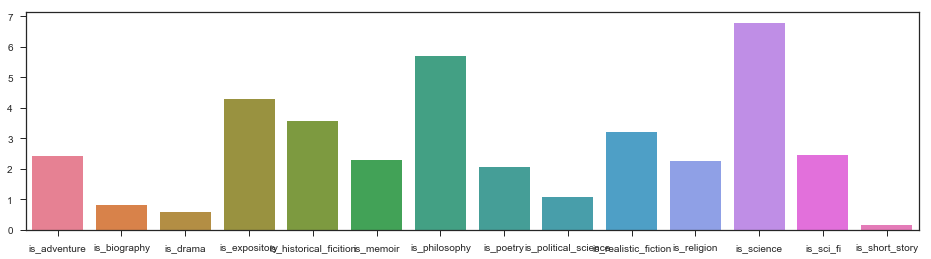

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
cs = data[data_sg].cumsum()
sns.barplot(data=cs,
            palette='husl',
            ax=ax,
            ci=None)
print(data[data_sg].describe())

In [10]:
ratings = data['rating']
data_numsolo = data.drop(columns=['title', 'author', 'book_id', 'isbn13','finished','started', 'rating'])


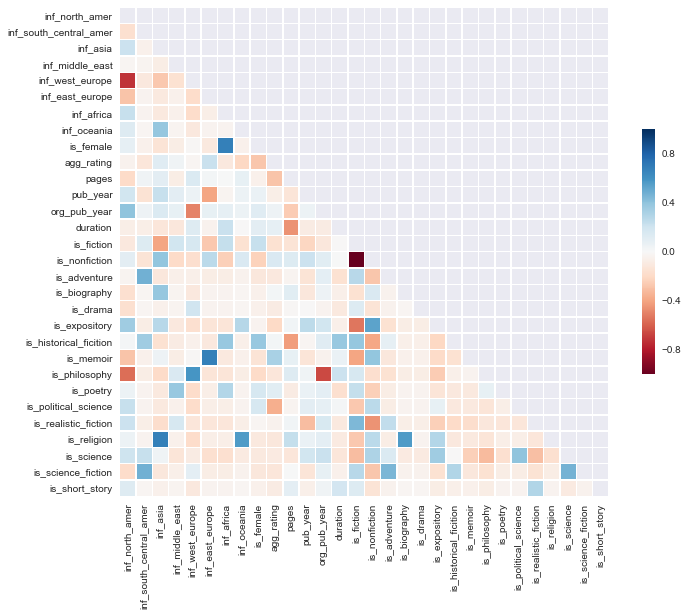

In [11]:
c = data_numsolo.corr()

mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,9))

with sns.axes_style("white"):
    sns.heatmap(c, mask=mask, cmap='RdBu', vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [12]:
from sklearn.manifold import TSNE
x_embed_data = TSNE(n_components=2, perplexity=8, n_iter=1500).fit_transform(data_numsolo)

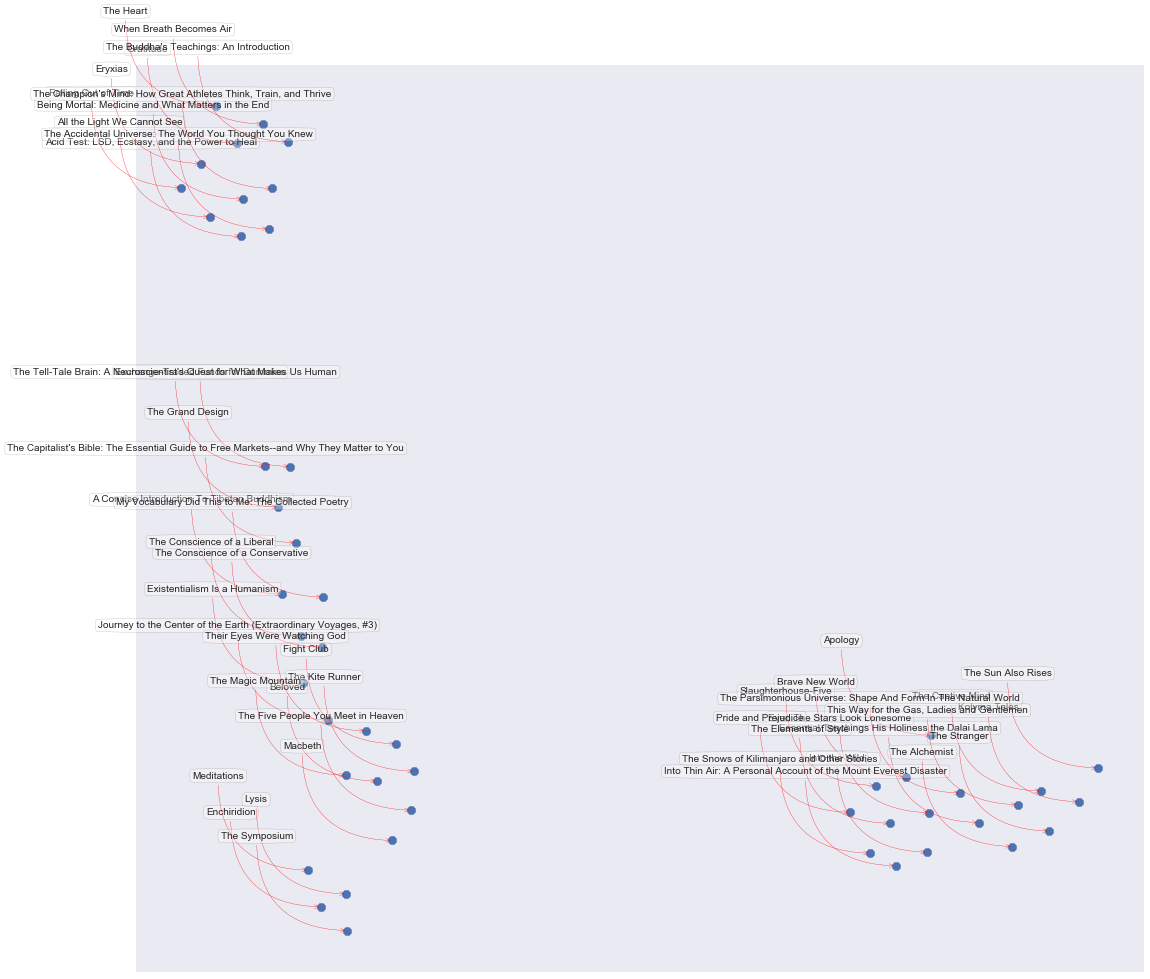

In [13]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(frameon=True)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(x_embed_data[:, 0], x_embed_data[:, 1], s=80, marker="8")

for row_id in range(0, len(x_embed_data)):
    target_word = data['title'][row_id]
    xx = x_embed_data[row_id, 0]
    yy = x_embed_data[row_id, 1]
    plt.annotate(target_word, (xx, yy), size=10, xytext=(-90, 90),
                 textcoords='offset points', ha='center', va='bottom',
                 bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',
                                 color='red'))

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(data_numsolo).transform(data_numsolo)

In [15]:
pca1 = pd.Series(X_r[:,0], name='x')
pca2 = pd.Series(X_r[:,1], name='y')

print(pca.explained_variance_ratio_)

[ 0.96815615  0.01103543]


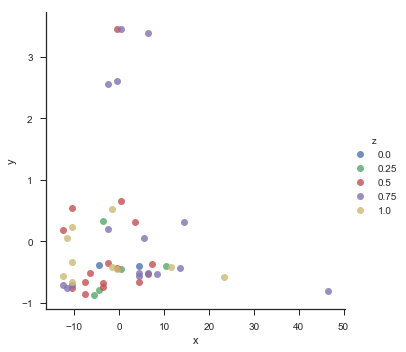

In [76]:
ratings.name = 'z'

sns.lmplot('x', 'y',
           data=pd.concat([pca1,pca2,ratings],axis=1),
           hue='z',
           fit_reg=False)